_Lambda School Data Science, Unit 2_
 
# Regression 1 Sprint Challenge

Your Sprint Challenge has two parts.

To demonstrate mastery on each part, do all the required, numbered instructions. 

To earn a score of "3" for the part, also do the stretch goals.

## Part 1. Predict avocado sales 🥑

For part 1 of your challenge, you'll use historical data on avocado sales across the nation!

Run this code cell to load the dataset. It has weekly sales volume (total number of avocados sold) from January 4, 2015 through March 25, 2018. The data comes directly from retailers' cash registers based on actual retail sales of Hass avocados in multiple US markets.

In [122]:
import pandas as pd
avocado_url = 'https://drive.google.com/uc?export=download&id=1ljE-LhCA9CCFvSIJYJ1ewX8JmdDpfuhi'
avocado = pd.read_csv(avocado_url)
assert avocado.shape == (169, 2)
import seaborn as sns

In [123]:
avocado.head()

,Date,Total Volume
0,2015-01-04,84674288
1,2015-01-11,78555753
2,2015-01-18,78388735
3,2015-01-25,76466226
4,2015-02-01,119453181


In [124]:
avocado.tail()

,Date,Total Volume
164,2018-02-25,109231389
165,2018-03-04,111844876
166,2018-03-11,111465145
167,2018-03-18,113673928
168,2018-03-25,118268903


In [125]:
avocado.shape

(169, 2)

In [126]:
avocado['Date'] = pd.to_datetime(avocado['Date'])
avocado = avocado.set_index('Date')

In [127]:
pd.plotting.register_matplotlib_converters()

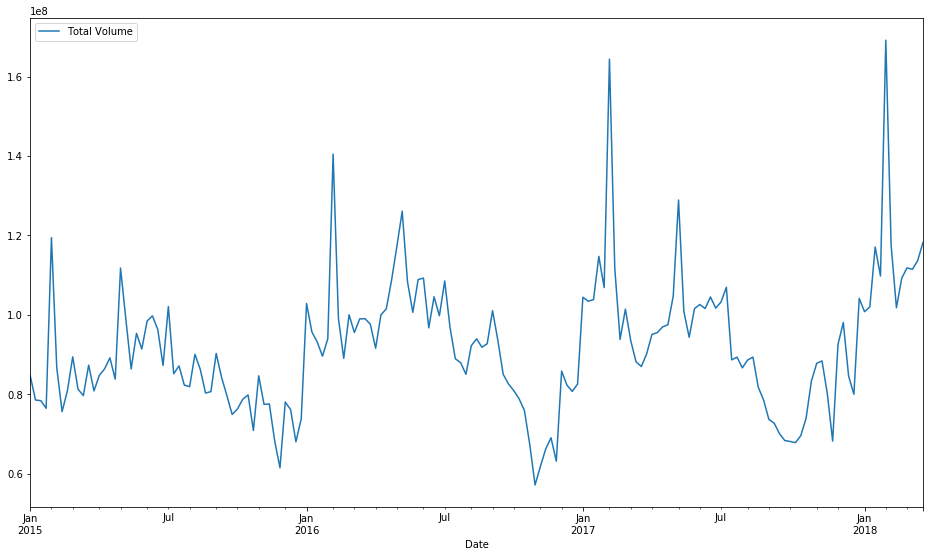

In [128]:
# Plotting original data to see

avocado.plot(figsize=(16,9))

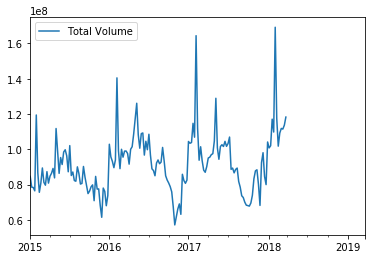

In [129]:
# adding prediction room

avocado = avocado.reindex(pd.date_range(start='2015-01-04', end='2019-03-25', freq='W'))
avocado.plot();

In [130]:
avocado.head()

,Total Volume
2015-01-04,84674288.0
2015-01-11,78555753.0
2015-01-18,78388735.0
2015-01-25,76466226.0
2015-02-01,119453181.0


In [131]:
# formatting for Prophet

avocado = avocado.reset_index().rename(columns = {'index': 'ds', 'Total Volume': 'y'})

In [227]:
avocado.head()

,ds,y
0,2015-01-04,84674288.0
1,2015-01-11,78555753.0
2,2015-01-18,78388735.0
3,2015-01-25,76466226.0
4,2015-02-01,119453181.0


In [133]:
from fbprophet import Prophet
m = Prophet()
m.fit(avocado)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
/Users/mattmastin/anaconda3/lib/python3.7/site-packages/pystan/misc.py:399: FutureWarning:

Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.



In [136]:
future = m.make_future_dataframe(periods=53, freq='W')
future.tail()

,ds
269,2020-03-01
270,2020-03-08
271,2020-03-15
272,2020-03-22
273,2020-03-29


In [137]:
forecast = m.predict(future)

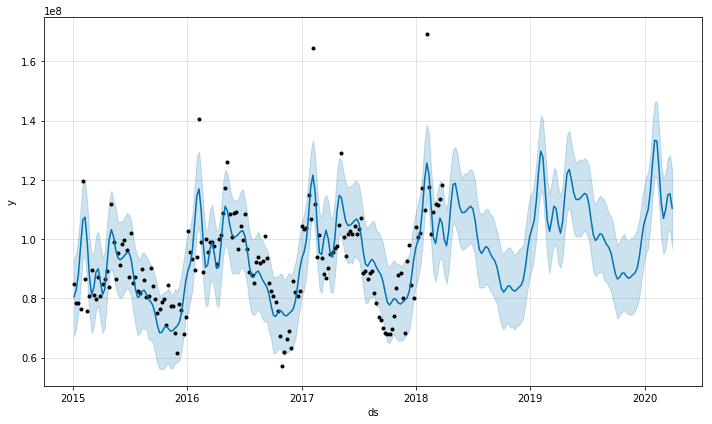

In [138]:
# plotting predictions

fig1 = m.plot(forecast)

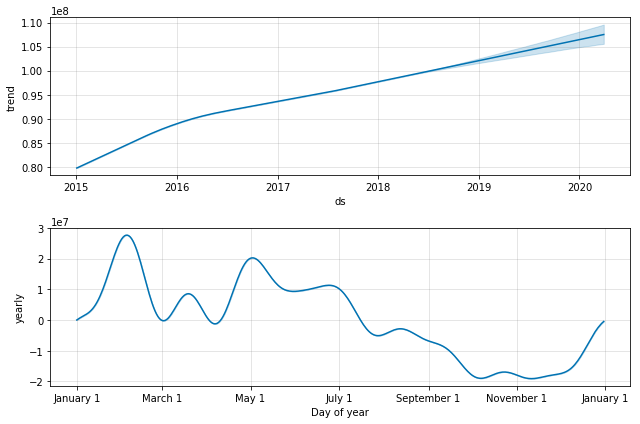

In [139]:
# plotting model components

fig2 = m.plot_components(forecast)

In [179]:
# building cross validation model

from fbprophet.diagnostics import cross_validation
avocado_cv = cross_validation(m, initial= '730 days',
                             horizon = '90 days', period = '45 days')

INFO:fbprophet:Making 8 forecasts with cutoffs between 2017-02-13 00:00:00 and 2017-12-25 00:00:00
/Users/mattmastin/anaconda3/lib/python3.7/site-packages/pystan/misc.py:399: FutureWarning:

Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.

/Users/mattmastin/anaconda3/lib/python3.7/site-packages/pystan/misc.py:399: FutureWarning:

Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.

/Users/mattmastin/anaconda3/lib/python3.7/site-packages/pystan/misc.py:399: FutureWarning:

Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.

/Users/mattmastin/anaconda3/lib/python3.7/site-packages/pystan/misc.py:399: FutureWarning:

Conversion of the second argument of i

In [181]:
print(avocado_cv.shape)
avocado_cv.head()

(103, 6)


,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,2017-02-19,1.074485e+08,9.636653e+07,1.186948e+08,93821369.0,2017-02-13
1,2017-02-26,9.893847e+07,8.727163e+07,1.101863e+08,101447375.0,2017-02-13
2,2017-03-05,9.916884e+07,8.800520e+07,1.106531e+08,93528247.0,2017-02-13
3,2017-03-12,1.051806e+08,9.379616e+07,1.163189e+08,88180047.0,2017-02-13
4,2017-03-19,1.088121e+08,9.743226e+07,1.191144e+08,86991403.0,2017-02-13


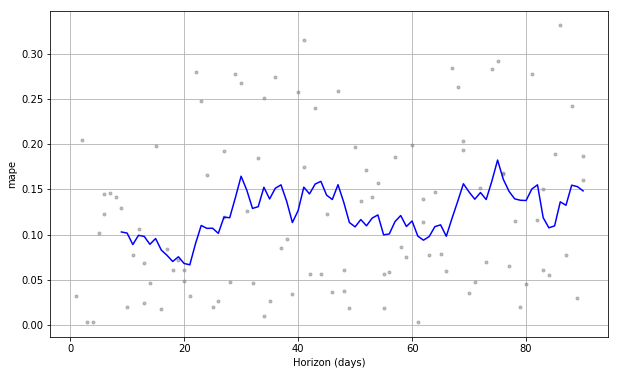

In [182]:
# plotting cross validation metric - matches rubric!

from fbprophet.plot import plot_cross_validation_metric
fig = plot_cross_validation_metric(avocado_cv, metric='mape')

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
/Users/mattmastin/anaconda3/lib/python3.7/site-packages/pystan/misc.py:399: FutureWarning:

Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.



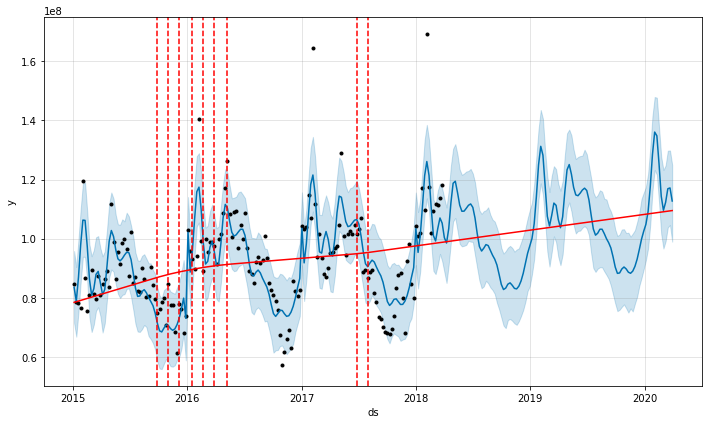

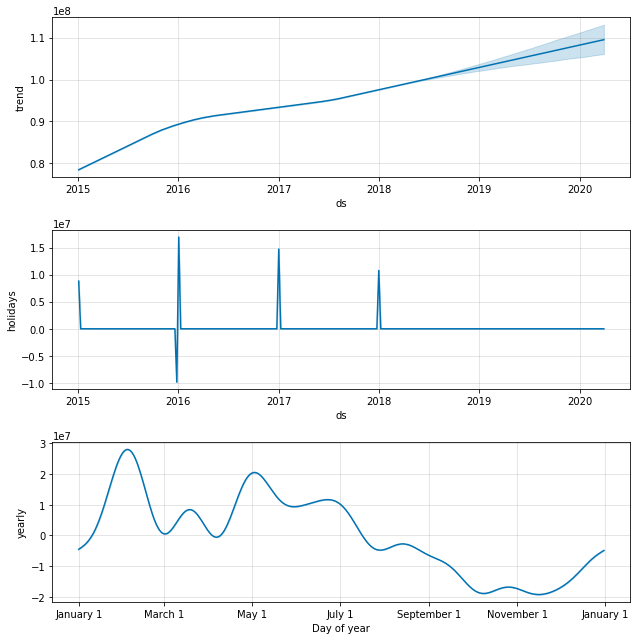

In [230]:
# sales are high in January, not sure what 'holiday' it is or exact week
# so running Prophet holidays for all of January
# doesn't seem to work correctly

from fbprophet.plot import add_changepoints_to_plot

holidays = pd.DataFrame({'holiday': 'january',
                        'ds': pd.to_datetime(['2015-01', '2016-01',
                                            '2017-01', '2018-01', 
                                            '2019-01', '2020-01']),
                        'lower_window': -5, 'upper_window': 5})

model = Prophet(daily_seasonality=False, holidays=holidays)
model.fit(avocado)
future = model.make_future_dataframe(periods=53, freq='W')
forecast = model.predict(future)
fig1 = model.plot(forecast)
add_changepoints_to_plot(fig1.gca(), model, forecast)
fig2 = model.plot_components(forecast)

### Required

#### Use the Prophet library to:
1. Fit a model and forecast avocado sales through March 25, 2020
2. Plot the forecast
3. Plot the forecast components
4. Do time series cross-validation, with these parameters: `horizon='90 days', period='45 days', initial='730 days'`
5. Plot the cross-validation Mean Absolute Percentage Error: `metric='mape'`

_For Part 1 of this Sprint Challenge, you are **not** required to calculate or plot baselines, or do train/test split._

You can be confident you've done it correctly when your plots look similar to these:

<img src="https://i.imgur.com/PoyVGp7.png" width="400" align="left">



### Stretch Goal
- Adjust your forecasts with Prophet's options for changepoints, holidays, and fourier order. Improve the cross-validation MAPE.

## Part 2. Predict NYC apartment rent 🏠💸

For part 1 of your challenge, you'll use a real-world data with rent prices for a subset of apartments in New York City!

Run this code cell to load the dataset: 

In [183]:
import pandas as pd
rent_url = 'https://drive.google.com/uc?export=download&id=1lVVPmh-WYGb_0Gs_lOv22i02-150qDdZ'
rent = pd.read_csv(rent_url)
assert rent.shape == (48295, 7)

In [184]:
rent.head()

,year,month,bedrooms,bathrooms,latitude,longitude,price
0,2016,6,3,1.5,40.7145,-73.9425,3000
1,2016,6,2,1.0,40.7947,-73.9667,5465
2,2016,4,1,1.0,40.7388,-74.0018,2850
3,2016,4,1,1.0,40.7539,-73.9677,3275
4,2016,4,4,1.0,40.8241,-73.9493,3350


In [185]:
target = 'price'

rent['Mean Baseline'] = [rent[target].mean()] * len(rent)

In [186]:
rent.head()

,year,month,bedrooms,bathrooms,latitude,longitude,price,Mean Baseline
0,2016,6,3,1.5,40.7145,-73.9425,3000,3438.052034
1,2016,6,2,1.0,40.7947,-73.9667,5465,3438.052034
2,2016,4,1,1.0,40.7388,-74.0018,2850,3438.052034
3,2016,4,1,1.0,40.7539,-73.9677,3275,3438.052034
4,2016,4,4,1.0,40.8241,-73.9493,3350,3438.052034


In [187]:
rent.describe()

,year,month,bedrooms,bathrooms,latitude,longitude,price,Mean Baseline
count,48295.0,48295.000000,48295.000000,48295.000000,48295.000000,48295.000000,48295.000000,4.829500e+04
mean,2016.0,5.014950,1.508417,1.177927,40.750784,-73.972366,3438.052034,3.438052e+03
std,0.0,0.824537,1.091198,0.423621,0.039555,0.029563,1401.003716,3.129149e-09
min,2016.0,4.000000,0.000000,0.000000,40.571200,-74.094000,1025.000000,3.438052e+03
25%,2016.0,4.000000,1.000000,1.000000,40.728100,-73.991700,2495.000000,3.438052e+03
50%,2016.0,5.000000,1.000000,1.000000,40.751600,-73.977900,3100.000000,3.438052e+03
75%,2016.0,6.000000,2.000000,1.000000,40.774000,-73.954700,4000.000000,3.438052e+03
max,2016.0,6.000000,6.000000,4.000000,40.915400,-73.700100,9999.000000,3.438052e+03


In [215]:
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error

In [189]:
print('MAE for mean baseline: ', mean_absolute_error(rent['price'], rent['Mean Baseline']))
print('R^2 for mean baseline: ', r2_score(rent['price'], rent['Mean Baseline']))

MAE for mean baseline:  1055.7857771080928
R^2 for mean baseline:  0.0


In [200]:
# setting up model and train-test-split
# all months are April, May or June, so using '< 6' for April and May

from sklearn.linear_model import LinearRegression
model = LinearRegression()

features = ['bedrooms', 'bathrooms']
target = 'price'

train = rent.query('month < 6')
test = rent.query('month == 6')

X_train = train[features]
y_train = train[target]
X_test = test[features]
y_test = test[target]

In [201]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((31512, 2), (31512,), (16783, 2), (16783,))

In [202]:
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [203]:
y_pred = model.predict(X_test)

In [214]:
print('MAE for bathroom/bedroom feature Linear Regression', mean_absolute_error(y_test, y_pred))
print('R^2 for bathroom/bedroom feature Linear Regression', r2_score(y_test, y_pred))

MAE for bathroom/bedroom feature Linear Regression 754.0733041489015
R^2 for bathroom/bedroom feature Linear Regression 0.46135848519077227


In [205]:
model.intercept_, model.coef_

(994.3062975058106, array([ 420.5097168 , 1531.76264753]))

In [212]:
# 3d plotting for fun/stretch

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d

def viz3d(fitted_model, df, features, target = '', num=100):
    feature1, feature2 = features
    x1 = np.linspace(df[feature1].min(), df[feature1].max(), num)
    x2 = np.linspace(df[feature2].min(), df[feature2].max(),num)
    X1, X2 = np.meshgrid(x1, x2)
    X = np.c_[X1.flatten(), X2.flatten()]
    if hasattr(fitted_model, 'predict_proba'):
        predicted = fitted_model.predict_proba(X)[:, 1]
    else:
        predicted = fitted_model.predict(X)
    Z = predicted.reshape(num, num)
    
    fig = plt.figure()
    ax = plt.axes(projection='3d')
    ax.plot_surface(X1, X2, Z, cmap='plasma')
    ax.set_xlabel(feature1)
    ax.set_ylabel(feature2)
    ax.set_zlabel(target)

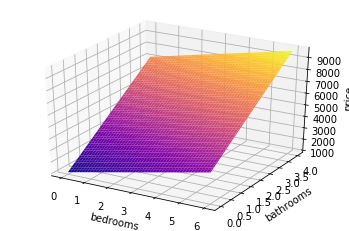

In [213]:
%matplotlib inline

viz3d(model, rent, features, target)

In [220]:
# running a linear regression on all features

model = LinearRegression()

features = ['bedrooms', 'bathrooms', 'latitude', 'longitude']
target = 'price'

train = rent.query('month < 6')
test = rent.query('month == 6')

X_train = train[features]
y_train = train[target]
X_test = test[features]
y_test = test[target]

In [221]:
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [222]:
y_pred = model.predict(X_test)

In [224]:
print('MAE for all features Linear Regression', mean_absolute_error(y_test, y_pred))
print('R^2 for all features Linear Regression', r2_score(y_test, y_pred))
print('MSE for all features Linear Regression', mean_squared_error(y_test, y_pred))
print('RMSE for all features Linear Regression', np.sqrt(mean_squared_error(y_test, y_pred)))

MAE for all features Linear Regression 667.6543093383497
R^2 for all features Linear Regression 0.5637948359714801
MSE for all features Linear Regression 862202.4295733054
RMSE for all features Linear Regression 928.5485606974497


In [219]:
# doing extra, not sure why but this cell gives too many outputs
# seems like it's running through every line individually and not grouping the months

# features = ['bedrooms', 'bathrooms', 'latitude', 'longitude']
# target = 'price'

# maes = []
# mses = []
# rmses = []
# r2s = []

# for month in rent['month']:
#     print(f'linreg with all features on all months except {month}')
#     model = LinearRegression()
#     train = rent[rent['month'] != month]
#     test = rent[rent['month'] == month]
#     X_train = train[features]
#     y_train = train[target]
#     X_test = test[features]
#     y_test = test[target]
    
#     model.fit(X_train, y_train)
    
#     y_pred = model.predict(X_test)
    
#     mae = mean_absolute_error(y_test, y_pred)
#     mse = mean_squared_error(y_test, y_pred)
#     rmse = np.sqrt(mean_squared_error(y_test, y_pred))
#     r2 = r2_score(y_test, y_pred)
    
#     maes.append(mae)
#     mses.append(mse)
#     rmses.append(rmse)
#     r2s.append(r2)
    
#     print(f'MAE on prediction for {month} = {mae}')
#     print(f'MSE on prediction for {month} = {mse}')
#     print(f'RMSE on prediction for {month} = {rmse}')
#     print(f'R^2 on prediction for {month} = {r2}')

### Required
1. Begin with baselines for regression. Calculate the mean absolute error and $R^2$ score for a mean baseline. _(You can use the whole dataset, or a test set, either way is okay here!)_
2. Do train/test split. Use data from April & May 2016 to train. Use data from June 2016 to test.
3. Choose any two features.
4. Use scikit-learn to fit a Linear Regression model on the train data.
5. Apply the model to predict rent prices for the test data.
6. Get regression metrics MAE and $R^2$ for the test data.
7. Get the model's coefficients and intercept.

### Stretch Goals
- Try at least 3 different feature combinations. (You don't have to use two features, you can choose any number of features.)
- Get regression metrics RMSE, MAE, and $R^2$, for both the train and test data.